## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [2]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

clf = DecisionTreeClassifier(
        criterion='gini',
        max_depth=None,
        min_samples_split=5,
        min_samples_leaf=5
)
# 在iris手動調整沒甚麼特別不同
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [3]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9736842105263158


In [4]:
def get_best_model_and_accuracy(model, params, X, y):
    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(model, params, cv=5, error_score=0, n_jobs=-1)
    grid.fit(X, y)
    print(f"Best accuracy: {grid.best_score_}")
    print(f"Best params: {grid.best_params_}")
    print(f"Average time to fit (s): {grid.cv_results_['mean_fit_time'].mean():.3f}")
    print(f"Average time to score (s): {grid.cv_results_['mean_score_time'].mean():.3f}")

In [5]:
# 找出最佳搭配

from sklearn.pipeline import Pipeline

clf = DecisionTreeClassifier()

pipeline = Pipeline([
    ('clf', clf)
])
params = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [2, 5, 10],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [2, 5, 10],
}
get_best_model_and_accuracy(pipeline, params, X, y)

Best accuracy: 0.96
Best params: {'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2}
Average time to fit (s): 0.001
Average time to score (s): 0.000


Accuracy = 0.974


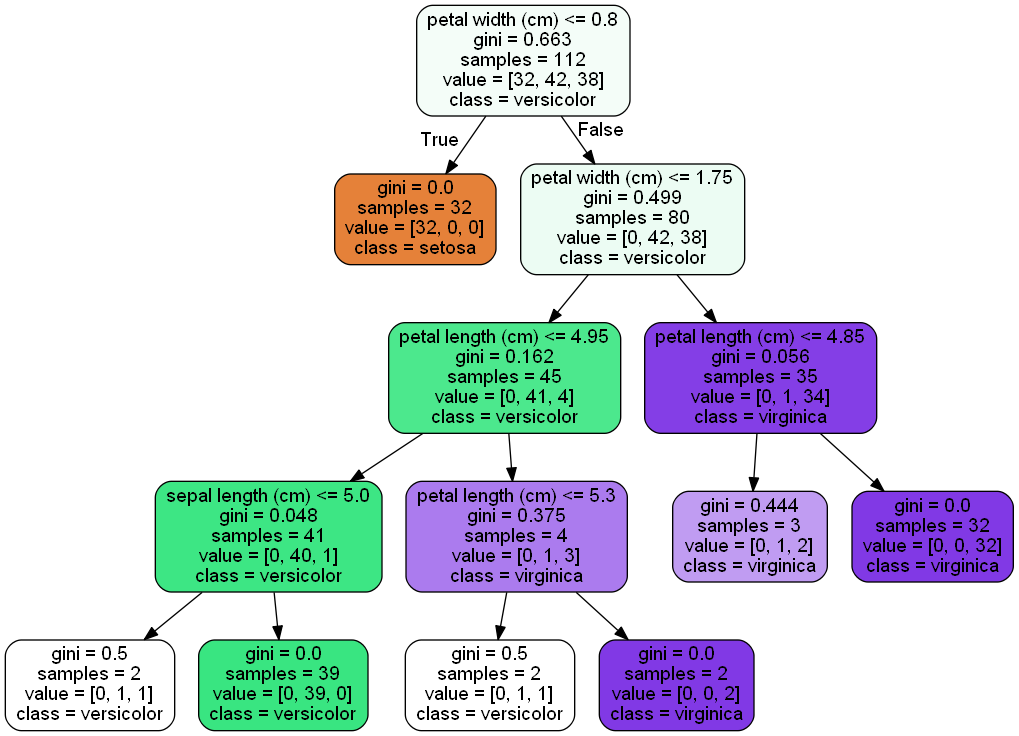

In [7]:
# 繪製架構圖

clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred):.3f}")

from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(
    clf, 
    filled=True,
    rounded=True,
    class_names=iris.target_names,
    feature_names=iris.feature_names,
    out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

from IPython.display import Image
Image(filename = 'tree.png', width=500)